# TALLER N°1 ANALISIS DE DATOS

### Integrantes:

* Matias Bunster
* 
* 
* Ariel Leyton 

El objetivo del siguiente taller, es responder a una serie de preguntas ficticias de investigación utilizando los métodos enseñados para analizar.



In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyreadstat
import random

In [7]:
pip install pandas-datareader

     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     -------------------------------------- 109.5/109.5 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Pregunta 1 - Bajando y formateando datos del Banco Mundial

Replique el ejemplo práctico de importar datos desde la API del Banco Mundial y empezar la base para su análisis de series de tiempo.

Importe usted la serie de GDP total Y Percapita para otro país serie desde la API del Banco mundial, muestre sus principales características y realice un grafico.

¿Pareciera haber tendencias? Explique.

#### 1.1 Crear el dataframe

Para ello obtendremos los datos desde la API del Banco Mundial y elegiremos un Pais para analizar.

In [9]:

from pandas_datareader import data, wb # para instalar: conda install pandas-datareader  o  pip install pandas-datareader

#Revisemos que indicadores hay disponibles. En este caso revisare de PIB (GDP en ingés), pero se pueden explorar muchas más opciones.

wb.search('gdp')

,id,name,unit,source,sourceNote,sourceOrganization,topics
688,6.0.GDP_current,GDP (current $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth
689,6.0.GDP_growth,GDP growth (annual %),,LAC Equity Lab,Annual percentage growth rate of GDP at market...,b'World Development Indicators (World Bank)',Economy & Growth
690,6.0.GDP_usd,GDP (constant 2005 $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth
691,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
1503,BG.GSR.NFSV.GD.ZS,Trade in services (% of GDP),,World Development Indicators,Trade in services is the sum of service export...,"b'International Monetary Fund, Balance of Paym...",Economy & Growth ; Private Sector ; Trade
...,...,...,...,...,...,...,...
16707,UIS.XUNIT.GDPCAP.23.FSGOV,Initial government funding per secondary stude...,,Education Statistics,"Total general (local, regional and central, cu...",b'UNESCO Institute for Statistics',
16708,UIS.XUNIT.GDPCAP.23.FSHH,Initial household funding per secondary studen...,,Education Statistics,"Total payments of households (pupils, students...",b'UNESCO Institute for Statistics',
16709,UIS.XUNIT.GDPCAP.3.FSGOV,Initial government funding per upper secondary...,,Education Statistics,"Total general (local, regional and central, cu...",b'UNESCO Institute for Statistics',
16710,UIS.XUNIT.GDPCAP.5T8.FSGOV,Initial government funding per tertiary studen...,,Education Statistics,"Total general (local, regional and central, cu...",b'UNESCO Institute for Statistics',


In [21]:
# Obtengamos la lista de paises disponibles
countries=wb.get_countries()

#Preview primeras filas lista de paises
countries[:5]

,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.5167
1,AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
2,AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
3,AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
4,AFW,ZI,Africa Western and Central,Aggregates,,Aggregates,Aggregates,,NaN,NaN


In [29]:
countries['name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan', 'Africa',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi',
       'East Asia & Pacific (IBRD-only countries)',
       'Europe & Central Asia (IBRD-only countries)', 'Belgium', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Bulgaria',
       'IBRD countries classified as high income', 'Bahrain',
       'Bahamas, The', 'Bosnia and Herzegovina',
       'Latin America & the Caribbean (IBRD-only countries)', 'Belarus',
       'Belize', 'Middle East & North Africa (IBRD-only countries)',
       'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam',
       'Sub-Saharan Africa (IBRD-only countries)', 'Bhutan', 'Botswana',
       'Sub-Saharan Africa (IFC classification)',
       'Central African Republic', 'Canada',
       'East Asia 

#### 1.2 - Elección del país.

El país que elegiremos para trabajar será: Brasil.

In [27]:
countries[ countries['name'] == 'Brazil' ]

# Descarguemos la data desde la API del banco mundial a un dataframe

df_GPDpc_Brazil = wb.download(
                    #Use the indicator attribute to identify which indicator or indicators to download
                    indicator='NY.GDP.PCAP.KD',
                    #Use the country attribute to identify the countries you want data for
                    country=['BR'],
                    #Identify the first year for which you want the data, as an integer or a string
                    start='1980',
                    #Identify the last year for which you want the data, as an integer or a string
                    end=2020
                )

df_GPDpc_Chile.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 41 entries, ('Chile', '2020') to ('Chile', '1980')
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NY.GDP.PCAP.KD  41 non-null     float64
dtypes: float64(1)
memory usage: 2.0+ KB


In [58]:
df_GPDpc_Brazil.head(5)

NY.GDP.PCAP.KD
country year                
Brazil  2020     8255.567064
        2019     8592.210218
        2018     8553.864918
        2017     8470.939629
        2016     8426.842251

In [30]:
df_GPDpc_Brazil.droplevel('country')


reversed_df = df_GPDpc_Brazil.iloc[::-1] #invertimos el dataframe 
reversed_df= reversed_df.droplevel('country') # removemos el level pais, ya que todo el análisis es para un solo país
reversed_df.head(5)

,NY.GDP.PCAP.KD
year,
1980,6415.637075
1981,6001.644299
1982,5914.564397
1983,5613.610873
1984,5788.086505


#### 1.3 Análisis exploratorio de los datos

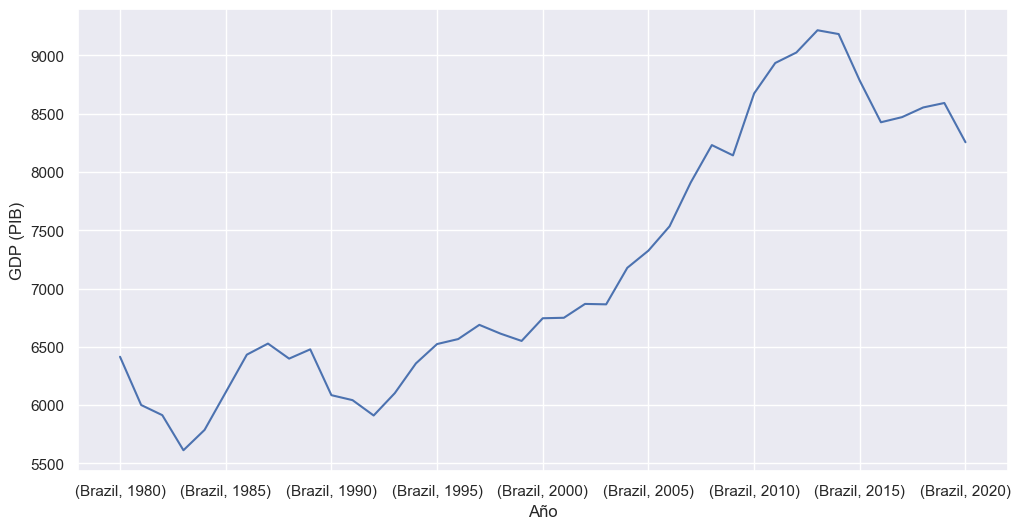

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aplica el estilo de Seaborn
sns.set_theme()

# Filtra los datos de Brasil desde el año 2020
data_brazil = df_GPDpc_Brazil['2020':]

# Invierte el orden del DataFrame
data_brazil2 = data_brazil[::-1]

# Cambia el tamaño del gráfico
plt.rcParams['figure.figsize'] = [12, 6]

# Crea el gráfico
ax = data_brazil2.plot(legend=False)
ax.set_ylabel(r'GDP (PIB)')
ax.set_xlabel(r'Año')

# Muestra el gráfico
plt.show()


Al analizar el primero gráfico creado con la información de Brazil, podemos notar que el PIB (gross domestic product para el dataframe) ha ido en aumento desde 1980 a 2020, sin embargo, este incremento no ha sido de forma lineal.

* Podemos notar que ha tenido caidas importantes en **1983**, **1993** y a contar de **2013** aproximadamente ha ido en un preocupante descenso.

In [54]:
df_GPDpc_Brazil.describe()

,NY.GDP.PCAP.KD
count,41.000000
mean,7190.314501
std,1116.555886
min,5613.610873
25%,6399.483631
50%,6745.856994
75%,8255.567064
max,9216.131219


Realizando un análisis mediante estadísticas descriptivas, podemos notar lo siguiente:

* Nuestra muestra considera un total de **41** años.
* El PIB promedio de dicha cantidad de años es de **7190.314501**.
* El peor año de Brasil en cuanto a crecimiento economico se dió en **1983**.
* Por otra parte, su mejor año fue en **2013**.

In [62]:
data_brazil2['Cambio_Porcentual'] = data_brazil2['NY.GDP.PCAP.KD'].pct_change() * 100

data_brazil2.describe()


C:\Users\ATFMED\AppData\Local\Temp\ipykernel_20988\1005592182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_brazil2['Cambio_Porcentual'] = data_brazil2['NY.GDP.PCAP.KD'].pct_change() * 100


,NY.GDP.PCAP.KD,Cambio_Porcentual
count,41.000000,40.000000
mean,7190.314501,0.683420
std,1116.555886,3.230973
min,5613.610873,-6.452871
25%,6399.483631,-1.086039
50%,6745.856994,0.993296
75%,8255.567064,2.981532
max,9216.131219,6.522816


Otro análisis interesante que se puede realizar al dtaset es revisar los cambios porcentuales del PIB durante 41 años.

* El Año en que se reudjo más el crecimiento económico del Brasil fue en **1981**.
* Por otra parte, el año de mayor crecimiento se dió en **2010**.
* Finalmente, podriamos decir que en promedio Brasil creció un **0,68%** en esos años.

### Resumen:

En resumen, podemos observar que durante los 41 años muestreados, Brasil ha experimentado un crecimiento económico generalmente positivo (**tendencia alcista**), aunque con algunos momentos de altibajos marcados.

 * 1983 se destaca como el año con el PIB más bajo registrado en estos 41 años.
 * 1990 fue otro duro año para Brasil ya que su PIB se redujo en un 6% aprox
 * A contar de 2010 sufre un aumento exponencialmente alto que se mantendrá hasta 2013.
 * 2013 fue un año notable, ya que marcó el punto más alto en el PIB, sin embargo, a partir de ese año comenzó un declive que persiste hasta la actualidad (2020).

## Pregunta 2 - Investigando sobre países

Considere que tenemos los datos del banco mundial, del país que selecciono anteriormente, y desea aprender sobre alguna característica de dicho pais en el periodo.

Escriba una pregunta de investigación que se pueda responder con los datos disponibles. ¿Cómo definiria la variable aleatoria relevante? ¿Qué hipótesis podria responder su pregunta?

#### 2.1 - Definición de variable aleatoria

## Pregunta 3 - Caso aplicación: Ejemplo AB test en Marketing

Imaginemos que trabajamos en una empresa de e-commerce que vende productos electrónicos y queremos aumentar las ventas en una línea de productos específica, como teléfonos móviles.

Para ello, decidimos utilizar una promoción de ventas basada en una ruleta lúdica que ofrecerá descuentos a los clientes que la utilicen.

Para implementar la promoción, primero seleccionamos aleatoriamente un grupo de clientes y les enviamos un correo electrónico con un enlace a la ruleta lúdica. Al hacer clic en el enlace, los clientes son redirigidos a una página en la que pueden girar la ruleta y ganar un descuento en su próxima compra.

Vamos a pensar que los clientes son asignados a uno de los siguientes grupos: - Control: no les da una promoción (mala suerte, intentalo otra vez) - Tratamiento 1: 20% de descuento en el producto - Tratamiento 2: Un complemento gratuito (carcasa) que tiene un costo para la empresa similar al descuento.


### Preguntas:

Estudiemos si la promoción fue efectiva en estos datos. Para esto:

- Describa los resultados de la promocion para los diferentes grupos, en terminos de estadisticas descriptivas.
- Compare visualmente los resultados de los diferentes grupos.
- ¿Fue la promocion efectiva? Use una prueba de hipotesis para analizar el grupo tratado y de control.
- ¿Cual de las promociones fue más efectiva? Use una prueba **ANOVA**.



In [14]:
# Define una semilla para la generación de números aleatorios
np.random.seed(123)
random.seed(123)

# Crear un vector de 200 valores aleatorios para el grupo de control
control = np.random.choice(["Control"], size=200, replace=True)

# Crear un vector de 200 valores aleatorios para el grupo de tratamiento
tratamiento = np.random.choice(["Treatment 1", "Treatment 2"], size=100, replace=True, p=[0.7, 0.3])

# Crear un vector de número de compras para cada grupo
control_compras = np.random.binomial(5, 0.2, size=200)
tratamiento1_compras = np.random.binomial(5, 0.4, size=100)
tratamiento2_compras = np.random.binomial(5, 0.6, size=100)

# Combinar los vectores en un DataFrame
data = {
    'grupo': np.concatenate((control, np.repeat("Treatment", 200))),
    'tipo_tratamiento': np.concatenate((np.repeat("Control", 200), np.repeat(["Treatment 1", "Treatment 2"], [100, 100]))),
    'ventas': np.concatenate((control_compras, tratamiento1_compras, tratamiento2_compras))
}

ventas_df = pd.DataFrame(data)

# Verificar el DataFrame
ventas_df.head(5)

,grupo,tipo_tratamiento,ventas
0,Control,Control,1
1,Control,Control,1
2,Control,Control,0
3,Control,Control,0
4,Control,Control,0


## Pregunta 4 - Caso de aplicación datos de educación

Nuestro objetivo es responder la siguiente pregunta ficticia de investigación:

* Asistir a cursos de verano, ¿mejora los resultados académicos?

Para responder esta pregunta, usaremos unos datos ficticios y simulados

La pregunta de investigación se inspira en trabajos como el de Matsudaira (2007) e intervenciones en estudiantes de bajo nivel socioeconómico por Dietrichson et al ( 2017).

El escenario ficticio es el siguiente:

* Para un conjunto de colegios en una comuna, existe la opción de asistir a un curso de verano intensivo durante el verano entre 5 y 6to básico.
* El curso de verano se enfoca en mejorar las habilidades académicas de preparar la prueba de admisión a la universidad vigente (PSU en ese momento)
* El curso de verano es gratuito, pero para ser matriculados requiere que los padres se involucren en un proceso.
* Estamos interesados en testear el impacto de la participación en el curso en los resultados académicos de los estudiantes.


### Objetivo:

La pregunta a responder será: **Asisitir a cursos de verano, ¿mejora los resultados academicos?**

Para ello, utilizaremos un dataset ficticio de nombre **school_data_1.csv** que contiene la siguiente información:


1) Información sobre cada individuo (con identificador id)
2) La escuela a la que asiste
3) Indicador si participó en el curso de verano
4) Sexo
5) Ingreso del hogar (en logaritmo)
6) Educación de los padres
7) Resultados en una prueba estandarizada que se realiza a nivel de la comuna tanto para el año 5 como para el año 6.


Antes de comenzar, prepararemos las librerias que utilizaremos.

### 1.Preparación de los datos

#### 1.1 Cargar los datos

Iniciaremos con la carga de los datos y procederemos a examinar las primeras filas y columnas con el fin de realizar un análisis superficial de los mismos.

In [5]:
df= pd.read_csv("E:/STUDY/3. DIPLOMADO DATA SCIENCE UDD/SEGUNDO TRIMESTRE/2 ANÁLISIS DE DATOS/TALLERES/TALLER 1/school_data_1.csv")
df2, metadata = pyreadstat.read_dta("E:/STUDY/3. DIPLOMADO DATA SCIENCE UDD/SEGUNDO TRIMESTRE/2 ANÁLISIS DE DATOS/TALLERES/TALLER 1/school_data_2.dta")
df3 = pd.read_excel("E:/STUDY/3. DIPLOMADO DATA SCIENCE UDD/SEGUNDO TRIMESTRE/2 ANÁLISIS DE DATOS/TALLERES/TALLER 1/school_data_3.xlsx")
df.head(5)

,person_id,school_id,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6
0,1,5,0,1,10.0,12.939209,NaN,1.636284
1,2,14,1,0,11.0,14.737391,1.297036,2.561449
2,3,7,1,0,14.0,16.083261,2.761908,3.526002
3,4,8,0,0,12.0,14.608081,1.772913,2.381062
4,5,9,1,0,11.0,13.756785,1.180356,1.959818


In [6]:
df2.head(5)

,person_id,letter
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


In [7]:
df3.head(5)

,person_id,test_year_2,test_year_3,test_year_4,test_year_7,test_year_8,test_year_9,test_year_10,learnings,school_id
0,1,1.090117,1.914594,2.065805,2.377697,2.032904,1.493803,1.880512,10.236394,5
1,2,1.246309,1.154470,1.582455,1.747376,2.444041,1.663050,1.833769,8.278911,14
2,3,2.726472,2.269011,3.247252,3.017764,3.361646,3.387020,2.968617,8.966529,7
3,4,2.693032,2.413203,1.479452,2.637954,3.021940,2.761513,2.088086,8.876466,8
4,5,1.660545,1.828067,1.361972,1.904636,2.109774,2.285818,1.845694,8.770518,9


Con este pequeño analisis, podemos notar cual es la variable de cada uno de los aspectos a revisar.

1) Información sobre cada individuo (con identificador id) = **person_id**
2) La escuela a la que asiste = **school_id**
3) Indicador si participó en el curso de verano = **summercamp**
4) Sexo = **female**
5) Ingreso del hogar (en logaritmo) = **paretnal_lincome**
6) Educación de los padres = **parental_schooling**
7) Resultados en una prueba estandarizada que se realiza a nivel de la comuna tanto para el año 5 como para el año 6. = **test_year_5** y **test_year_6**.

#### 1.2 Unir los datasets

Lo siguiente será unir los datasets, comenzando con el primero (data_school_1 = df) y el segundo (data_school_2 = df2).  El nuevo dataframe tendrá por nombre: **school_data**

In [8]:
school_data = df.merge(df2, on='person_id', how='inner')
school_data

,person_id,school_id,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6,letter
0,1,5,0,1,10.0,12.939209,NaN,1.636284,0.0
1,2,14,1,0,11.0,14.737391,1.297036,2.561449,0.0
2,3,7,1,0,14.0,16.083261,2.761908,3.526002,0.0
3,4,8,0,0,12.0,14.608081,1.772913,2.381062,0.0
4,5,9,1,0,11.0,13.756785,1.180356,1.959818,0.0
...,...,...,...,...,...,...,...,...,...
3486,3487,7,0,1,11.0,14.326670,2.673548,2.167499,0.0
3487,3488,2,1,0,12.0,14.525507,2.475244,2.682903,1.0
3488,3489,17,0,1,12.0,15.473269,NaN,2.932665,0.0
3489,3490,19,0,0,16.0,16.255371,2.443172,2.341365,0.0


Luego, unimos el último set de datos (df3 = dat_school_3) y lo agregamos a **school_data**

In [9]:
school_data = school_data.merge(df3, on='person_id', how='inner')
school_data

,person_id,school_id_x,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6,letter,test_year_2,test_year_3,test_year_4,test_year_7,test_year_8,test_year_9,test_year_10,learnings,school_id_y
0,1,5,0,1,10.0,12.939209,NaN,1.636284,0.0,1.090117,1.914594,2.065805,2.377697,2.032904,1.493803,1.880512,10.236394,5
1,2,14,1,0,11.0,14.737391,1.297036,2.561449,0.0,1.246309,1.154470,1.582455,1.747376,2.444041,1.663050,1.833769,8.278911,14
2,3,7,1,0,14.0,16.083261,2.761908,3.526002,0.0,2.726472,2.269011,3.247252,3.017764,3.361646,3.387020,2.968617,8.966529,7
3,4,8,0,0,12.0,14.608081,1.772913,2.381062,0.0,2.693032,2.413203,1.479452,2.637954,3.021940,2.761513,2.088086,8.876466,8
4,5,9,1,0,11.0,13.756785,1.180356,1.959818,0.0,1.660545,1.828067,1.361972,1.904636,2.109774,2.285818,1.845694,8.770518,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,3487,7,0,1,11.0,14.326670,2.673548,2.167499,0.0,2.198542,2.567570,2.677070,2.224623,1.904200,2.011383,2.285860,9.194703,7
3487,3488,2,1,0,12.0,14.525507,2.475244,2.682903,1.0,2.183005,1.678833,2.658048,2.697586,2.893422,2.456036,2.677294,9.528962,2
3488,3489,17,0,1,12.0,15.473269,NaN,2.932665,0.0,2.256085,1.828445,2.286756,2.719165,2.881728,2.488629,1.859447,9.625758,17
3489,3490,19,0,0,16.0,16.255371,2.443172,2.341365,0.0,3.269776,2.415659,2.697778,2.284438,1.975236,3.199817,2.597650,9.136200,19


Finalmente, revisamos nuestra información:

- Conteo de nulos
- Descripción de los datos

In [10]:
school_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3491 entries, 0 to 3490
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   person_id           3491 non-null   int64  
 1   school_id_x         3491 non-null   int64  
 2   summercamp          3491 non-null   int64  
 3   female              3491 non-null   int64  
 4   parental_schooling  3486 non-null   float64
 5   parental_lincome    3491 non-null   float64
 6   test_year_5         3485 non-null   float64
 7   test_year_6         3486 non-null   float64
 8   letter              3491 non-null   float64
 9   test_year_2         3491 non-null   float64
 10  test_year_3         3491 non-null   float64
 11  test_year_4         3491 non-null   float64
 12  test_year_7         3491 non-null   float64
 13  test_year_8         3491 non-null   float64
 14  test_year_9         3491 non-null   float64
 15  test_year_10        3491 non-null   float64
 16  learni

In [11]:
school_data.isnull().sum()

person_id             0
school_id_x           0
summercamp            0
female                0
parental_schooling    5
parental_lincome      0
test_year_5           6
test_year_6           5
letter                0
test_year_2           0
test_year_3           0
test_year_4           0
test_year_7           0
test_year_8           0
test_year_9           0
test_year_10          0
learnings             0
school_id_y           0
dtype: int64

In [12]:
school_data.describe()

,person_id,school_id_x,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6,letter,test_year_2,test_year_3,test_year_4,test_year_7,test_year_8,test_year_9,test_year_10,learnings,school_id_y
count,3491.000000,3491.000000,3491.000000,3491.000000,3486.000000,3491.000000,3485.000000,3486.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000
mean,1746.000000,15.655686,0.458894,0.515325,11.324727,14.562807,2.258909,2.517411,0.246921,2.224587,2.254009,2.249515,2.444453,2.450573,2.453095,2.454057,10.063569,15.655686
std,1007.909222,8.674339,0.498379,0.499837,1.104628,0.693530,0.684667,0.720642,0.431282,0.676501,0.674030,0.682811,0.742760,0.738015,0.739265,0.736627,1.279010,8.674339
min,1.000000,1.000000,0.000000,0.000000,10.000000,12.667598,-0.269616,0.282411,0.000000,-0.570077,-0.463976,0.014251,0.031388,-0.185596,-0.245648,-0.304286,5.386084,1.000000
25%,873.500000,8.000000,0.000000,0.000000,11.000000,14.115008,1.799708,2.007090,0.000000,1.771236,1.817996,1.782818,1.937678,1.927651,1.937140,1.941455,9.180964,8.000000
50%,1746.000000,15.000000,0.000000,1.000000,11.000000,14.520815,2.258287,2.449218,0.000000,2.237744,2.248572,2.249468,2.368546,2.388875,2.386815,2.377569,10.041026,15.000000
75%,2618.500000,23.000000,1.000000,1.000000,12.000000,14.946971,2.715426,3.018490,0.000000,2.664371,2.715288,2.709033,2.972072,2.959604,2.986067,2.969251,10.958777,23.000000
max,3491.000000,30.000000,1.000000,1.000000,23.000000,19.449821,4.689652,4.983078,1.000000,4.737349,4.388531,4.349952,4.771106,5.045062,4.656483,4.929489,14.620796,30.000000


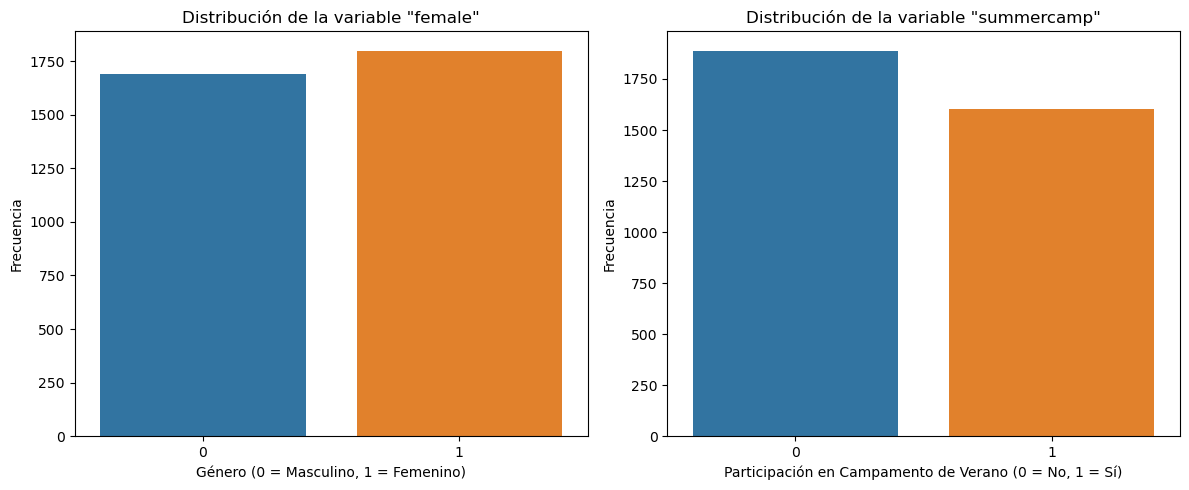

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=school_data, x='female')
plt.title('Distribución de la variable "female"')
plt.xlabel('Género (0 = Masculino, 1 = Femenino)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.countplot(data=school_data, x='summercamp')
plt.title('Distribución de la variable "summercamp"')
plt.xlabel('Participación en Campamento de Verano (0 = No, 1 = Sí)')
plt.ylabel('Frecuencia')

plt.tight_layout()

plt.show()

In [14]:
school_data['female'].value_counts()

1    1799
0    1692
Name: female, dtype: int64

In [15]:
school_data['summercamp'].value_counts()

0    1889
1    1602
Name: summercamp, dtype: int64

#### Primeras conclusiones

Revisados los datos, podemos comentar lo siguiente: 

- Existen algunos nulos en test_year_5 (6), test_year_6 (5) y parental_schooling (5).
- Tenemos 3491 filas, es decir, niños/personas.
- El ingreso promedio de los hogares familiares es de: **14,56**
- El nivel medio de escolaridad parental es de: **11,32**
- La proporción de mujeres es ligeramente mayor que la de hombres: **51,53% vs 48,47%** 
- Es mayor la cantidad de quienes no participaron en el campamento: **54,11% vs 45,89%**

### 2.Preparar los datos

#### 2.1 Tidying los datos

Transformaremos los datos de un formato wide a un formato long utilizando wide()

In [16]:
school_data_long = pd.melt(school_data)
school_data_long

,variable,value
0,person_id,1.0
1,person_id,2.0
2,person_id,3.0
3,person_id,4.0
4,person_id,5.0
...,...,...
62833,school_id_y,7.0
62834,school_id_y,2.0
62835,school_id_y,17.0
62836,school_id_y,19.0


In [17]:
school_data_long.isnull().sum()

variable     0
value       16
dtype: int64